# ISLP - Chapter 2 - Exercise 9
### Author: pzuehlke

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
Auto = pd.read_csv("Auto.csv")
Auto = Auto.dropna()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


__Exercise 9 (a):__ Using `Auto.info()`, we see that this dataset has $ 9 $
columns. All variables are quantitative except for `name`. However, note that
the datatype of `horsepower` is `object` even though it is also quantitative.


In [20]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


__Exercise 9 (b):__ We begin by trying to convert `horsepower` to a numeric
type, but this results in an error:

In [24]:
Auto["horsepower"] = pd.to_numeric(Auto["horsepower"])

ValueError: Unable to parse string "?" at position 32

We see that the problem is that there is at least one entry in this column which
is equal to the string '?'. So we need to replace those with NA:

In [28]:
Auto['horsepower'] = Auto['horsepower'].replace('?', pd.NA)
Auto.dropna()
Auto["horsepower"] = pd.to_numeric(Auto["horsepower"])
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Now the only non-quantitative column is "name". Let's make it the index.

In [29]:
Auto.set_index("name", inplace=True)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


Finally, let's compute the range of each predictor as requested:

In [31]:
Auto.max() - Auto.min()

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
dtype: float64

__Exercise 9 (c):__ Here are the means:

In [33]:
Auto.mean()

mpg               23.515869
cylinders          5.458438
displacement     193.532746
horsepower       104.469388
weight          2970.261965
acceleration      15.555668
year              75.994962
origin             1.574307
dtype: float64

And the standard deviations:

In [34]:
Auto.std()

mpg               7.825804
cylinders         1.701577
displacement    104.379583
horsepower       38.491160
weight          847.904119
acceleration      2.749995
year              3.690005
origin            0.802549
dtype: float64

__Exercise 9 (d):__

In [35]:
Auto_cut = Auto.drop(Auto.index[10:86])
# Means:
Auto_cut.mean()

mpg               25.136429
cylinders          5.285714
displacement     180.085714
horsepower        99.321300
weight          2884.514286
acceleration      15.708571
year              77.564286
origin             1.642857
dtype: float64

In [ ]:
# Standard deviations:
auto_cut.std()

mpg               8.005341
cylinders         1.640813
displacement     96.638556
horsepower       34.422903
weight          797.716926
acceleration      2.603003
year              3.014209
origin            0.830178
dtype: float64

In [ ]:
# Ranges:
Auto_cut.max() - Auto_cut.min()

mpg               35.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3197.0
acceleration      16.1
year              12.0
origin             2.0
dtype: float64

__Exercise 9 (e):__

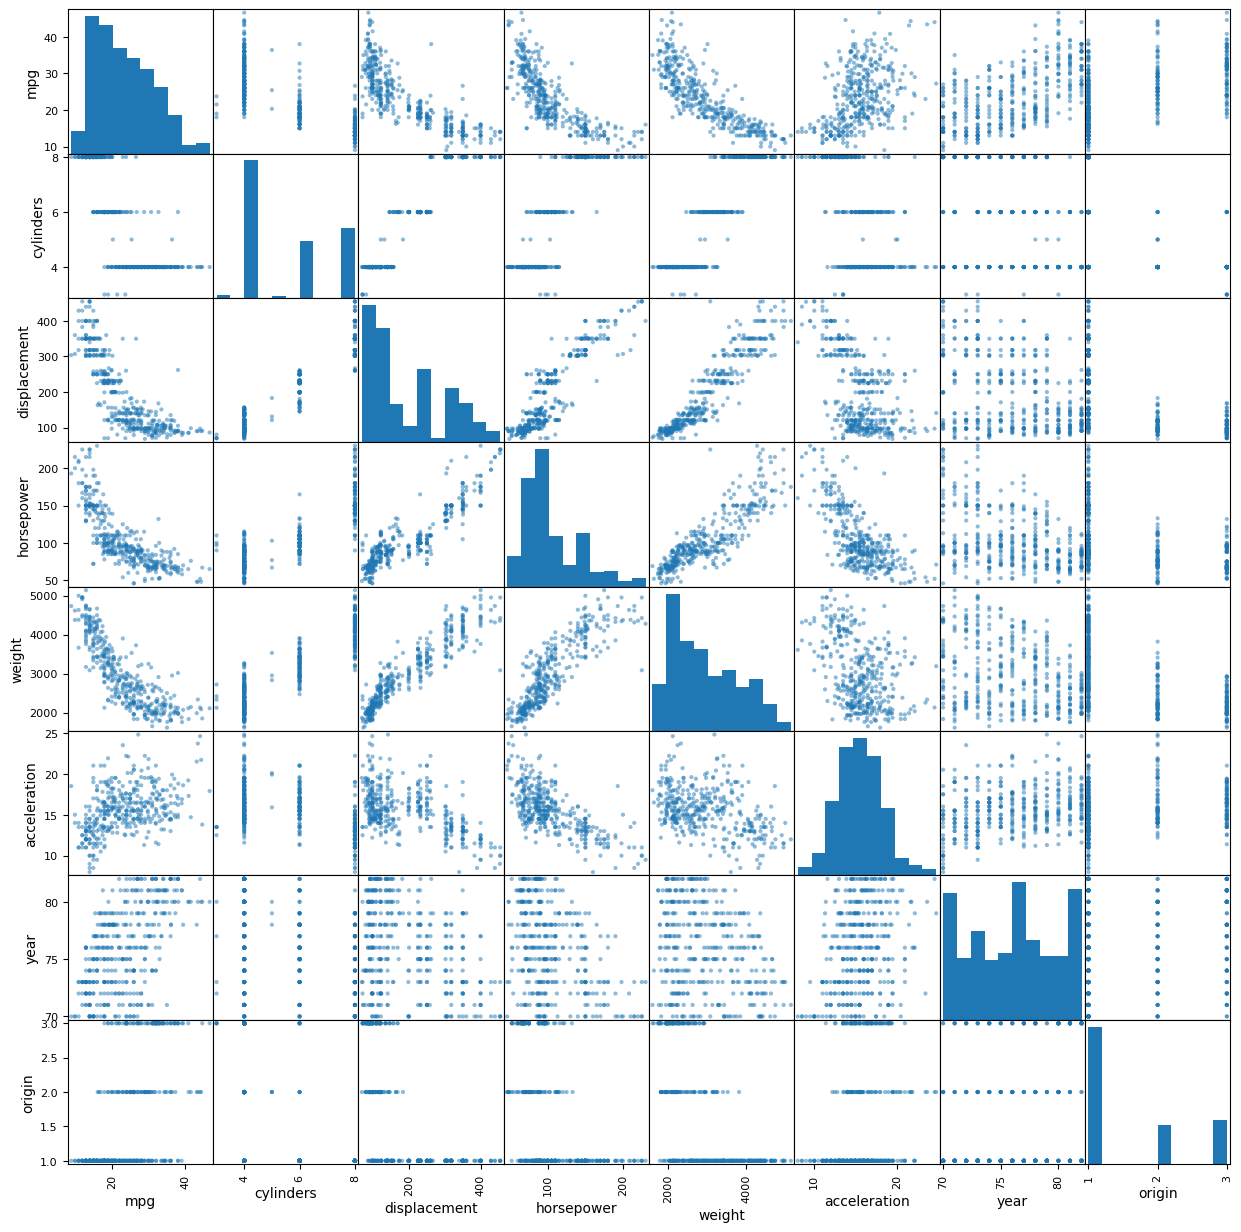

In [37]:
pd.plotting.scatter_matrix(Auto, figsize=(15, 15));

Focusing on the first line, there seems to be a quadratic relationship between
miles per gallon and each of weight, horsepower and displacement. Interestingly,
there seems to be a trend that newer cars achieve a higher mileage per gallon,
which is perhaps explained by better engineering. Also, cars with a higher
acceleration tend to have higher mpg, although the nature of this relationship
is not as transparent and the correlation seems to be lower.

__Exercise 9 (f):__ Was answered above.